## Soru 8
### Cagri Gokpunar

### Grup 5

Kütüphaneleri çağıralım:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate #cubic spline için

İşlemleri yapıp grafik üzerinde görelim:

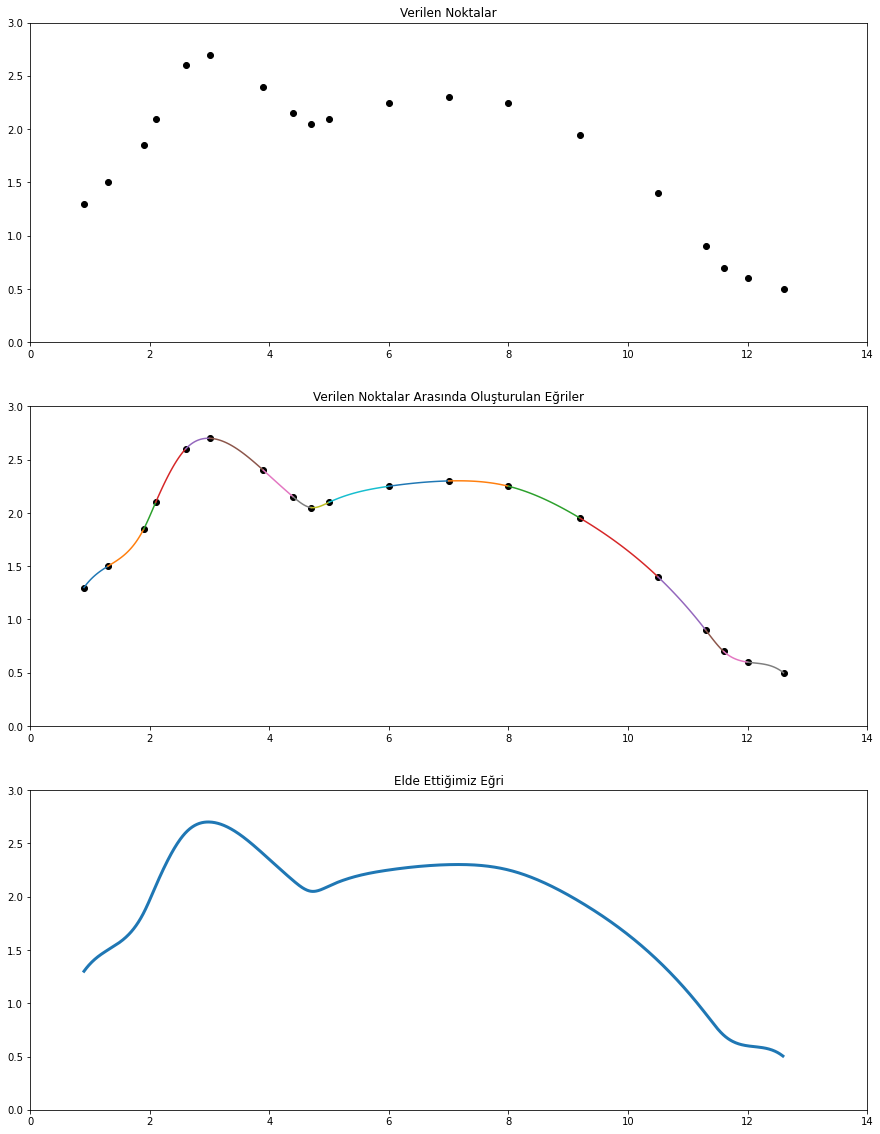

In [83]:
#verilen noktaları array içinde tanımlayalım:
x=np.array([0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5])

#toplamda 3 adet grafik oluşturalım:
fig,ax=plt.subplots(3,1,figsize=(15,20))

#eğrimiz için scipy kütüphanesinden CubicSpline fonksiyonunu kullanacağız
cubicSpline=interpolate.CubicSpline(x, y)
splineXaxis = np.arange(np.amin(x), np.amax(x), 0.01) #daha sonra eğriyi üzerinde yansıtmak için bir aralık belirledik

#ilk grafiğimiz verilen noktaları göstersin:
ax[0].set_xlim(0,14)
ax[0].set_ylim(0,3)
ax[0].set_title("Verilen Noktalar")
ax[0].scatter(x,y,c="k")

#ikinci grafiğimiz verilen noktalar arasında eğri oluştursun. noktalarımızı tekrar gösterelim:
ax[1].set_xlim(0,14)
ax[1].set_ylim(0,3)
ax[1].set_title("Verilen Noktalar Arasında Oluşturulan Eğriler")
ax[1].scatter(x,y,c="k")

for i in range(x.shape[0]-1): #x.shape[0] array'in eleman sayısını veriyor. düngü 0'dan başladığı için -1 koyuyoruz
    curveAxis=np.linspace(x[i], x[i+1], 100) #x'in i ve i+1. elemanının arasında 100 eleman oluşturduk
    #100 elemanın her biri için (x-x[i])**3, (x-x[i])**2... şeklinde eğrinin x'li kısımlarını tanımlayalım:
    curveXvalues=(curveAxis-x[i])[None,:]**np.arange(4)[::-1,None]
    #x'li kısımları katsayılarla çarparak toplayalım (bu denklemi elde etmek demek):
    curveOrdinate=cubicSpline.c[:,i].dot(curveXvalues) 
    #cubicSpline.c katsayıları veriyor, dot ise skaler çarpım anlamında
    #katsayıları bulduğumuz x'li kısımlarla skaler çarpıma tabi tutup eğrileri elde ediyoruz
    ax[1].plot(curveAxis,curveOrdinate) #grafik üzerinde görelim
    
#son olarak oluşturduğumuz eğrinin tamamını görelim
ax[2].set_xlim(0,14)
ax[2].set_ylim(0,3)
ax[2].set_title("Elde Ettiğimiz Eğri")
#örnek olarak bilgisayara cubicSpline(2) girdisini verirsek bize bulduğu eğride x=2'ye karşılık gelen y değerini verecek
#10. satırda oluşturduğumuz array'i hatırlayalım. bunu cubicSpline'ın içine yazarak eğriyi plot edebiliriz
ax[2].plot(splineXaxis, cubicSpline(splineXaxis),lw="3") #lw: line width

plt.show()